**Stock Indices: % Change Analysis and Interconnections**

In [117]:
import yfinance as yf
import pandas as pd

indices = {
    "DAX": "^GDAXI", "FTSE 100": "^FTSE", "CAC 40": "^FCHI", "IBEX 35": "^IBEX",
    "Euro Stoxx 50": "^STOXX50E", "Dow Jones": "^DJI", "S&P 500": "^GSPC",
    "NASDAQ": "^IXIC", "Russell 2000": "^RUT", "Nikkei 225": "^N225",
    "Hang Seng": "^HSI", "BSE Sensex": "^BSESN", "NSE Nifty 50": "^NSEI", "SSE Composite": "000001.SS"
}

dataframes = {}
for name, ticker in indices.items():
    stock = yf.Ticker(ticker)
    hist_data = stock.history(period="6mo")

    hist_data = hist_data.drop(columns=["Dividends", "Stock Splits"])

    hist_data["% Change"] = hist_data["Close"].pct_change() * 100
    hist_data["% ChangeStatus"] = hist_data["% Change"].apply(lambda x: "Bullish" if x > 1 else "Bearish" if x < -1 else "Regular")

    dataframes[name] = hist_data

combined_df = pd.concat(dataframes, names=["Index", "Date"])
top_5_combined_df = combined_df.groupby("Index").head(5)
display(top_5_combined_df)

flat_df = combined_df.reset_index()
flat_df["Date"] = pd.to_datetime(flat_df["Date"], utc=True).dt.date
flat_df["% ChangeStatus"] = flat_df["% Change"].apply(lambda x: "Bullish" if x > 1 else "Bearish" if x < -1 else "Neutral")


# display(flat_df)

# display(flat_df)



Open          High  \
Index         Date                                                    
DAX           2024-08-05 00:00:00+02:00  17525.589844  17525.589844   
              2024-08-06 00:00:00+02:00  17422.570312  17505.230469   
              2024-08-07 00:00:00+02:00  17438.650391  17666.820312   
              2024-08-08 00:00:00+02:00  17516.050781  17696.669922   
              2024-08-09 00:00:00+02:00  17672.900391  17788.720703   
FTSE 100      2024-08-05 00:00:00+01:00   8174.700195   8174.700195   
              2024-08-06 00:00:00+01:00   8008.200195   8058.299805   
              2024-08-07 00:00:00+01:00   8026.700195   8177.000000   
              2024-08-08 00:00:00+01:00   8166.899902   8166.899902   
              2024-08-09 00:00:00+01:00   8145.000000   8203.500000   
CAC 40        2024-08-05 00:00:00+02:00   7099.589844   7158.600098   
              2024-08-06 00:00:00+02:00   7160.069824   7184.290039   
              2024-08-07 00:00:00+02:00   7161.939941   7287.850098   
              2024-08-08 00:00:00+02:00   7223.009766   7262.080078   
              2024-08-09 00:00:00+02:00   7259.700195   7319.509766   
IBEX 35       2024-08-05 00:00:00+02:00  10402.900391  10479.500000   
              2024-08-06 00:00:00+02:00  10463.599609  10488.599609   
              2024-08-07 00:00:00+02:00  10483.900391  10632.599609   
              2024-08-08 00:00:00+02:00  10528.099609  10577.299805   
              2024-08-09 00:00:00+02:00  10601.200195  10687.700195   
Euro Stoxx 50 2024-08-05 00:00:00+02:00   4605.720215   4605.720215   
              2024-08-06 00:00:00+02:00   4580.120117   4607.819824   
              2024-08-07 00:00:00+02:00   4592.870117   4683.720215   
              2024-08-08 00:00:00+02:00   4661.819824   4673.660156   
              2024-08-09 00:00:00+02:00   4678.439941   4703.220215   
Dow Jones     2024-08-05 00:00:00-04:00  39056.191406  39056.191406   
              2024-08-06 00:00:00-04:00  38736.218750  39449.531250   
              2024-08-07 00:00:00-04:00  39230.089844  39477.960938   
              2024-08-08 00:00:00-04:00  38940.378906  39508.398438   
              2024-08-09 00:00:00-04:00  39408.058594  39628.660156   
S&P 500       2024-08-05 00:00:00-04:00   5151.140137   5250.890137   
              2024-08-06 00:00:00-04:00   5206.419922   5312.339844   
              2024-08-07 00:00:00-04:00   5293.129883   5330.640137   
              2024-08-08 00:00:00-04:00   5252.569824   5328.029785   
              2024-08-09 00:00:00-04:00   5314.660156   5358.669922   
NASDAQ        2024-08-05 00:00:00-04:00  15712.530273  16453.460938   
              2024-08-06 00:00:00-04:00  16261.360352  16620.310547   
              2024-08-07 00:00:00-04:00  16622.310547  16709.810547   
              2024-08-08 00:00:00-04:00  16408.269531  16694.250000   
              2024-08-09 00:00:00-04:00  16636.519531  16789.220703   
Russell 2000  2024-08-05 00:00:00-04:00   2021.859985   2061.739990   
              2024-08-06 00:00:00-04:00   2045.199951   2087.040039   
              2024-08-07 00:00:00-04:00   2088.110107   2094.800049   
              2024-08-08 00:00:00-04:00   2056.899902   2084.889893   
              2024-08-09 00:00:00-04:00   2085.500000   2086.760010   
Nikkei 225    2024-08-05 00:00:00+09:00  35249.359375  35301.179688   
              2024-08-06 00:00:00+09:00  32077.330078  34911.800781   
              2024-08-07 00:00:00+09:00  34122.351562  35849.769531   
              2024-08-08 00:00:00+09:00  34645.789062  35379.648438   
              2024-08-09 00:00:00+09:00  35272.339844  35671.308594   
Hang Seng     2024-08-05 00:00:00+08:00  16676.820312  16944.589844   
              2024-08-06 00:00:00+08:00  16861.300781  16908.970703   
              2024-08-07 00:00:00+08:00  16684.779297  16988.259766   
              2024-08-08 00:00:00+08:00  16773.039062  17023.099609   
              2024-08-09 00:00:00+08:00  17097.359375  17252.220703   
BS

**Replicating Google Finance on Feb 04th 2025**

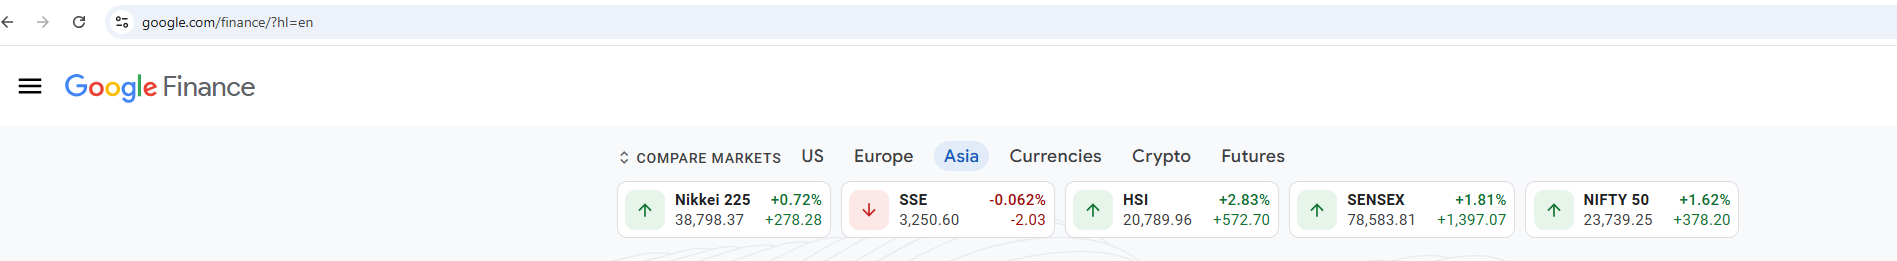

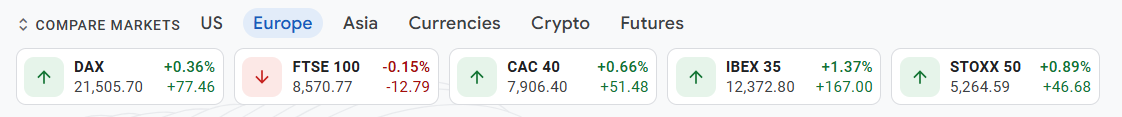

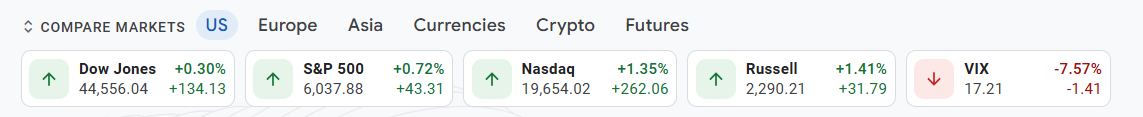

In [118]:
#Today Trends (As on Feb 04th 2025, slight adjustments due to timezone)
print("Today Trends (As on Feb 04th 2025)")
latest_df = flat_df.loc[flat_df.groupby("Index")["Date"].idxmax()]
display(latest_df)

Today Trends (As on Feb 04th 2025)


,Index,Date,Open,High,Low,Close,Volume,% Change,% ChangeStatus
1513,BSE Sensex,2025-02-03,77687.601562,78658.593750,77402.367188,78583.812500,0,1.809987,Bullish
383,CAC 40,2025-02-03,0.000000,0.000000,0.000000,7906.399902,0,0.655385,Neutral
126,DAX,2025-02-03,21474.789062,21518.539062,21298.710938,21505.699219,0,0.361481,Neutral
764,Dow Jones,2025-02-04,44469.500000,44597.710938,44328.519531,44556.039062,561364946,0.301943,Neutral
638,Euro Stoxx 50,2025-02-03,0.000000,0.000000,0.000000,5264.589844,0,0.894605,Neutral
254,FTSE 100,2025-02-04,8583.559570,8583.589844,8524.660156,8570.769531,0,-0.149472,Neutral
1386,Hang Seng,2025-02-03,20488.289062,20885.490234,20297.640625,20789.960938,0,2.832734,Bullish
512,IBEX 35,2025-02-03,12204.299805,12387.400391,12174.400391,12372.799805,121115208,1.368202,Bullish
1016,NASDAQ,2025-02-04,19422.199219,19666.443359,19408.179688,19654.015625,6037468000,1.351357,Bullish
1640,NSE Nifty 50,2025-02-03,23509.900391,23762.750000,23423.150391,23739.250000,0,1.618931,Bullish


In [119]:
# Pivot the flat_df to align data by Date
pivot_data = flat_df.pivot(index="Date", columns="Index", values="% ChangeStatus").fillna("No Trade")

# Inspect the pivoted data
display(pivot_data)

# # Compute the conditional probabilities
# prob_table = (
#     pivot_data.groupby(["Hang Seng", "Nikkei 225"])["BSE Sensex"]
#     .value_counts(normalize=True)
#     .unstack()
# )

# # Display the probability table
# display(prob_table)
#"SSE Composite": "000001.SS"
# Compute the actual counts
prob_table_counts = (
    pivot_data.groupby(["Hang Seng", "Nikkei 225", "SSE Composite"])["BSE Sensex"]
    .value_counts()
    .unstack()
)

# Display the table with actual counts
display(prob_table_counts)


Index,BSE Sensex,CAC 40,DAX,Dow Jones,Euro Stoxx 50,FTSE 100,Hang Seng,IBEX 35,NASDAQ,NSE Nifty 50,Nikkei 225,Russell 2000,S&P 500,SSE Composite
Date,,,,,,,,,,,,,,
2024-07-28,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,Neutral
2024-07-29,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,Neutral
2024-07-30,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,Bullish
2024-07-31,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,Neutral
2024-08-01,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,No Trade,Neutral
2024-08-04,Neutral,Neutral,Neutral,No Trade,Neutral,Neutral,Neutral,Neutral,No Trade,Neutral,Neutral,No Trade,No Trade,Bearish
2024-08-05,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Bullish,Neutral,Neutral,Neutral
2024-08-06,Bullish,Bullish,Bullish,Neutral,Bullish,Bullish,Bullish,Bullish,Bullish,Bullish,Bullish,Bullish,Bullish,Neutral
2024-08-07,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Bearish,Neutral,Neutral,Bearish,Neutral,Neutral


BSE Sensex                          Bearish  Bullish  Neutral  No Trade
Hang Seng Nikkei 225 SSE Composite                                     
Bearish   Bearish    Bullish            NaN      NaN      1.0       NaN
                     Neutral            NaN      NaN      1.0       NaN
          Bullish    Neutral            NaN      1.0      2.0       NaN
                     No Trade           1.0      NaN      NaN       NaN
          Neutral    Bearish            1.0      2.0      6.0       NaN
                     Neutral            1.0      NaN      6.0       NaN
          No Trade   Bearish            NaN      1.0      NaN       NaN
Bullish   Bearish    Bullish            1.0      NaN      1.0       NaN
                     No Trade           NaN      NaN      1.0       1.0
          Bullish    Bullish            NaN      NaN      3.0       NaN
                     Neutral            NaN      3.0      4.0       NaN
                     No Trade           NaN      NaN      1.0       NaN
          Neutral    Bullish            1.0      NaN      6.0       NaN
                     Neutral            NaN      1.0      7.0       NaN
                     No Trade           NaN      NaN      1.0       NaN
          No Trade   No Trade           NaN      1.0      NaN       NaN
Neutral   Bearish    Bearish            NaN      NaN      1.0       NaN
                     Neutral            3.0      NaN      6.0       NaN
                     No Trade           NaN      NaN      2.0       NaN
          Bullish    Neutral            NaN      2.0      6.0       NaN
          Neutral    Bearish            NaN      NaN      2.0       1.0
                     Bullish            NaN      NaN      2.0       NaN
                     Neutral            5.0      NaN     27.0       2.0
          No Trade   Bearish            NaN      NaN      2.0       NaN
                     Bullish            1.0      NaN      1.0       NaN
                     Neutral            1.0      NaN      2.0       NaN
                     No Trade           NaN      NaN      1.0       NaN
No Trade  Bullish    Neutral            NaN      NaN      1.0       NaN
                     No Trade           NaN      NaN      2.0       1.0
          Neutral    Bearish            NaN      NaN      1.0       NaN
                     Neutral            1.0      NaN      1.0       1.0
                     No Trade           NaN      NaN      2.0       NaN
          No Trade   Bullish            NaN      NaN      NaN       1.0
                     Neutral            NaN      NaN      NaN       4.0
                     No Trade           NaN      NaN      1.0      26.0

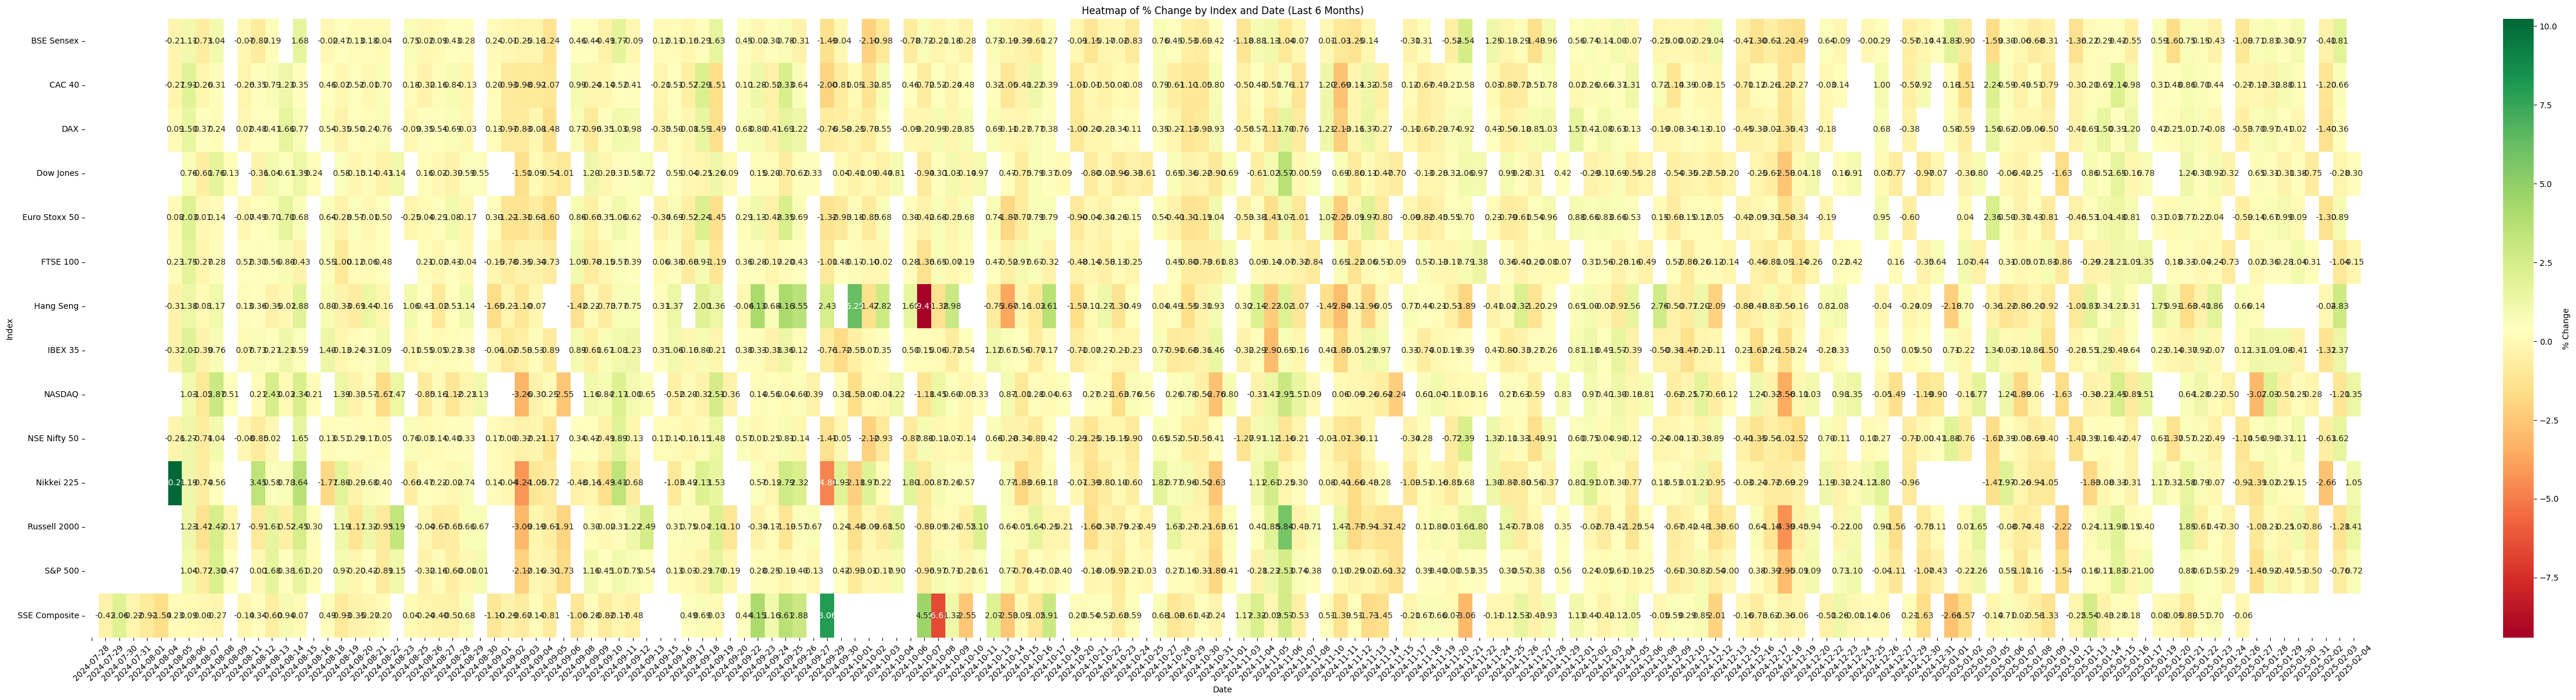

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

heatmap_data = flat_df.pivot(index="Index", columns="Date", values="% Change")

plt.figure(figsize=(50, 12))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="RdYlGn", cbar_kws={'label': '% Change'})
plt.title("Heatmap of % Change by Index and Date (Last 6 Months)")
plt.xlabel("Date")
plt.ylabel("Index")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

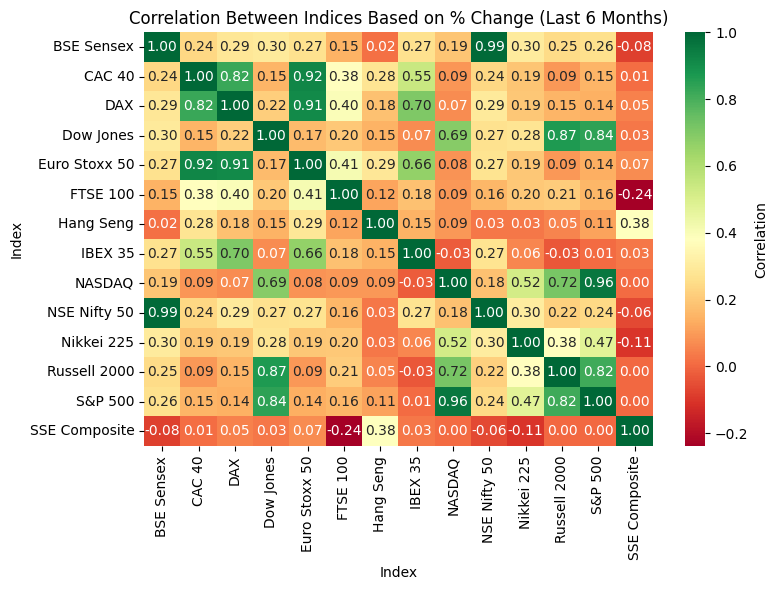

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_data = flat_df.pivot(index="Date", columns="Index", values="% Change")

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="RdYlGn", cbar_kws={'label': 'Correlation'})
plt.title("Correlation Between Indices Based on % Change (Last 6 Months)")
plt.xlabel("Index")
plt.ylabel("Index")
plt.tight_layout()
plt.show()

Take Away's:

BSE Sensex and NSE Nifty 50: Almost perfect correlation ( Approx 0.99) due to their shared Indian market dynamics.

S&P 500 and NASDAQ: Very high (Approx 0.96) driven by the interconnectedness of U.S. equity markets.

CAC 40 and Euro Stoxx 50: Strong (0.92), reflecting overlap in European market components.

DAX and Euro Stoxx 50: High (0.91) due to Germany's significant weight in the Eurozone.

Russell 2000 and S&P 500: Strong positive (0.82), indicating alignment in U.S. broader and small-cap indices.

(Few National Holidays Might Affect This Score Slightly)

In [2]:
!pip install yfinance